<a href="https://colab.research.google.com/github/neelindresh/OmdenaMarsSurface/blob/master/preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!rm -r OmdenaMarsSurface/

In [13]:
!git clone https://github.com/neelindresh/OmdenaMarsSurface.git

Cloning into 'OmdenaMarsSurface'...
remote: Enumerating objects: 11, done.
remote: Counting objects: 100% (11/11), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 11 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (11/11), done.


In [20]:
!ls OmdenaMarsSurface/DataSet/

pia22241-1041.jpg  pia22587.jpg


In [0]:
from skimage.exposure import rescale_intensity
import numpy as np
import argparse
import cv2

In [0]:
image = cv2.imread('OmdenaMarsSurface/DataSet/pia22241-1041.jpg',cv2.COLOR_BGR2GRAY)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [0]:
import matplotlib.pyplot as plt

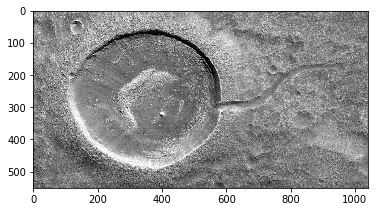

In [23]:
plt.imshow(gray)

In [0]:
canny=cv2.Canny(image,200,300)

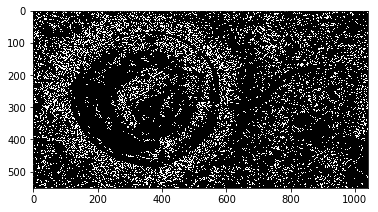

In [36]:
plt.imshow(cv2.cvtColor(canny, cv2.COLOR_GRAY2RGB))

In [0]:
laplacian = cv2.Laplacian(image,cv2.CV_64F)

sobely = cv2.Sobel(image,cv2.CV_64F,0,1,ksize=5)

In [0]:
sobelx = cv2.Sobel(image,cv2.CV_64F,1,0,ksize=9)
sobely = cv2.Sobel(image,cv2.CV_64F,0,1,ksize=9)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


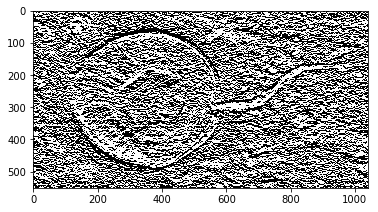

In [58]:
plt.imshow(sobely,cmap = 'gray')


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


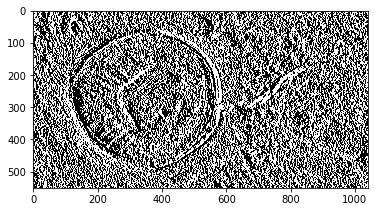

In [57]:
plt.imshow(sobelx,cmap = 'gray')

In [0]:
imgboth = cv2.addWeighted(sobelx, 0.5, sobely, 0.5, 0)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


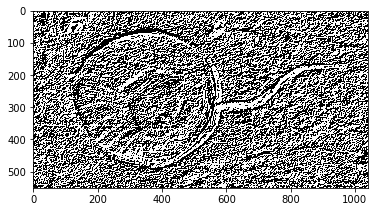

In [60]:
plt.imshow(imgboth,cmap = 'gray')

In [64]:
import matplotlib.pyplot as plt
import numpy as np

from skimage.data import astronaut
from skimage.color import rgb2gray
from skimage.filters import sobel
from skimage.segmentation import felzenszwalb, slic, quickshift, watershed
from skimage.segmentation import mark_boundaries
from skimage.util import img_as_float

img = img_as_float(astronaut()[::2, ::2])

segments_fz = felzenszwalb(image, scale=100, sigma=0.5, min_size=50)
segments_slic = slic(image, n_segments=250, compactness=10, sigma=1)
segments_quick = quickshift(image, kernel_size=3, max_dist=6, ratio=0.5)
gradient = sobel(rgb2gray(image))
segments_watershed = watershed(gradient, markers=250, compactness=0.001)

print("Felzenszwalb number of segments: {}".format(len(np.unique(segments_fz))))
print('SLIC number of segments: {}'.format(len(np.unique(segments_slic))))
print('Quickshift number of segments: {}'.format(len(np.unique(segments_quick))))



Felzenszwalb number of segments: 1850
SLIC number of segments: 222
Quickshift number of segments: 2427


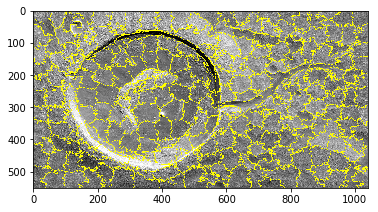

In [68]:
plt.imshow(mark_boundaries(image,segments_slic))

In [88]:
segments_slic = slic(image, n_segments=50, compactness=10, sigma=1)
gradient = sobel(rgb2gray(image))
segments_watershed = watershed(gradient, markers=250, compactness=0.1)
print('SLIC number of segments: {}'.format(len(np.unique(segments_slic))))

SLIC number of segments: 45


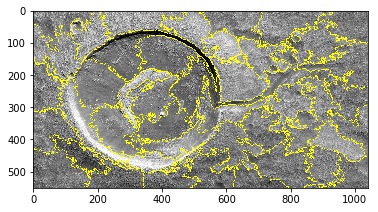

In [89]:
plt.imshow(mark_boundaries(image,segments_slic))

In [91]:
segments_slic.shape

(551, 1041)

In [93]:
image.shape

(551, 1041, 3)

In [0]:
markedImage=mark_boundaries(image,segments_slic)